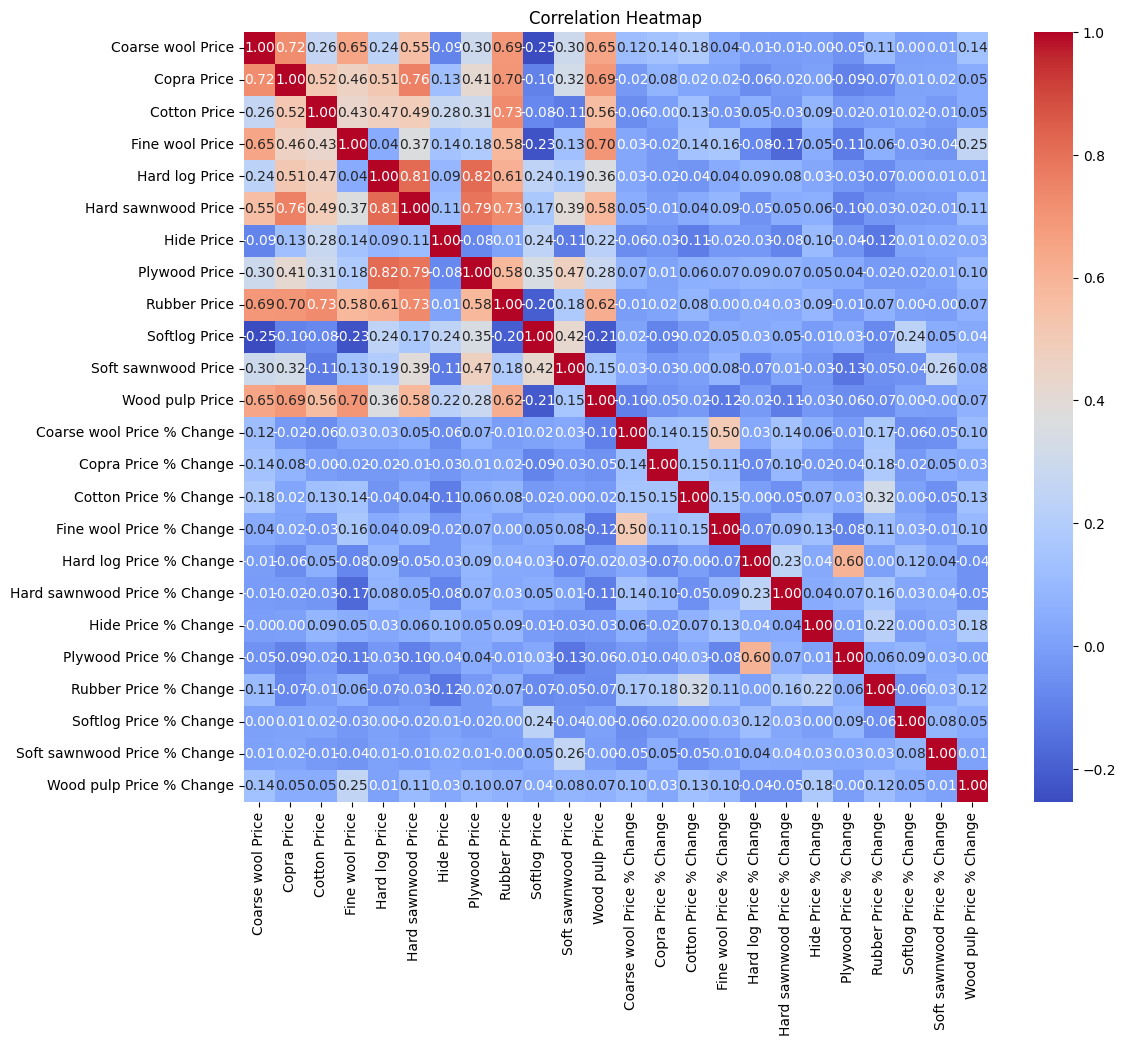

In [13]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pan.read_csv('/agricultural_raw_material.csv')

price_columns = [col for col in df.columns if 'Price' in col]
df[price_columns] = df[price_columns].apply(pan.to_numeric, errors='coerce')

materials_columns = [col for col in df.columns if 'Price' in col and '% Change' not in col]
for col in materials_columns:
    df[f'{col} % Change'] = df[col].pct_change() * 100

percent_change_columns = df.filter(like='% Change')
percent_change_columns = percent_change_columns.apply(pan.to_numeric, errors='coerce')
percent_change_columns = percent_change_columns.applymap(lambda x: abs(x) if pan.notnull(x) else np.nan)

high_change_materials = df[percent_change_columns.apply(lambda x: x > x.mean()).any(axis=1)]
low_change_materials = df[percent_change_columns.apply(lambda x: x < x.mean()).any(axis=1)]

price_range = df.describe().loc[['min', 'max']]

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

corr = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
